In [2]:
import warnings 

import matplotlib.image as mpimage 
import matplotlib.pyplot as plt 
import torch
import torchvision 
from torchvision import transforms 

warnings.filterwarnings("ignore")

First, get a random image. 

In [3]:
!wget -c -O pic.png "https://source.unsplash.com/random/750x750"

--2024-03-18 09:33:54--  https://source.unsplash.com/random/750x750
Resolving source.unsplash.com (source.unsplash.com)... 54.91.59.199, 3.232.242.170, 3.220.57.224, ...
Connecting to source.unsplash.com (source.unsplash.com)|54.91.59.199|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://images.unsplash.com/photo-1707743344479-1dbc7a20297f?crop=entropy&cs=tinysrgb&fit=crop&fm=jpg&h=750&ixid=MnwxfDB8MXxyYW5kb218MHx8fHx8fHx8MTcxMDc1MDgzNA&ixlib=rb-4.0.3&q=80&w=750 [following]
--2024-03-18 09:33:54--  https://images.unsplash.com/photo-1707743344479-1dbc7a20297f?crop=entropy&cs=tinysrgb&fit=crop&fm=jpg&h=750&ixid=MnwxfDB8MXxyYW5kb218MHx8fHx8fHx8MTcxMDc1MDgzNA&ixlib=rb-4.0.3&q=80&w=750
Resolving images.unsplash.com (images.unsplash.com)... 2a04:4e42:8d::720, 146.75.118.208
Connecting to images.unsplash.com (images.unsplash.com)|2a04:4e42:8d::720|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78759 (77K) [image/jpeg]
Saving to: 

In [6]:
img = torchvision.io.read_image("pic.png")

# use gpu if possobile 
# note that matplotlib cannot read gpu, so use cpu in certain cases
# anyway: on my mac don't expect cuda to work 
if torch.cuda.is_available():
    img = img.to("cuda")



Let us check the shape of the image. In PyTroch, images are stored in the form of [C,H,W]:
- C: Channel (e.g. grey, rgb)
- H: Height 
- W: Width 

Attention: Plotting libraries (matplotlib, numpy, PIL) are using [H,W,C], so some permutation is needed when displaying it. 

In [7]:
img.shape

torch.Size([3, 750, 750])

So needed permutation for displaying Pytorch-Tensors is shown in the next function.

In [9]:
def display_image(img: torch.Tensor) -> None: 
    plt.imshow(img.permute(1,2,0).cpu())

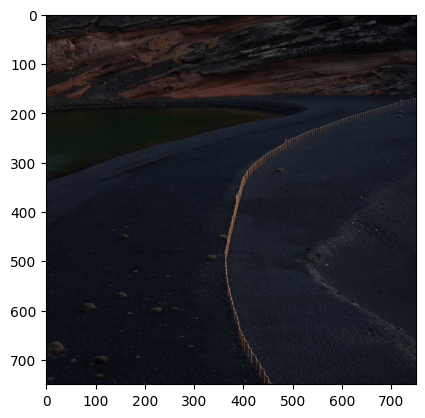

In [10]:
display_image(img)

CenterCrop crops the given image at the center with given dimesions.

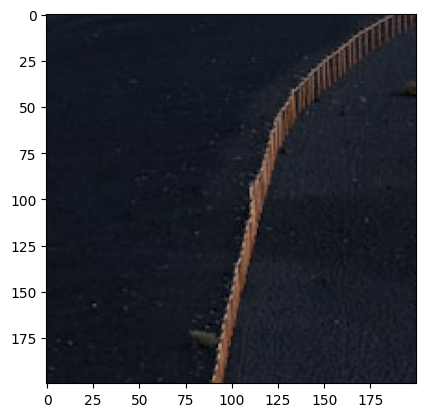

In [13]:
x = torchvision.transforms.CenterCrop([200,200]) # x is instance of data transformation 
display_image(x.forward(img)) # apply the transformation to the image using "forward"

Other transformers: 
- ColorJitter -> randomly change brightness (intensity of light in the image), contrast (differnece of intensity of brightest and darkest areas), saturation (purity of color) and hue (color)
- Grayscale(num_output_channels) -> greyscale version of the image
- Pad -> add padding to the image 
- RandomAffine -> random affine transformations to the image 
- RandomCrop, RandomGrayscale, RandomPerspective

torch.Size([3, 100, 100])

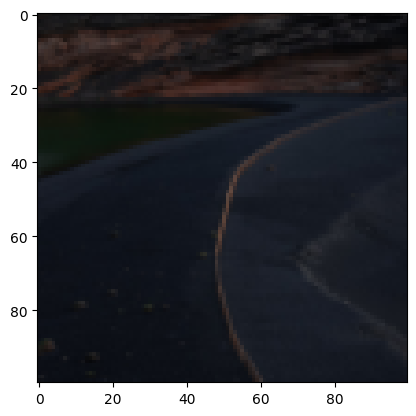

In [18]:
x = transforms.Resize([100, 100])
img2 = x.forward(img)
display_image(img2)
img2.shape

Now, let us normalizes a tensor image with mean and standard deviation (out = (in-mean)/stddev). The benefit is:
-  Normalizing images ensures that the input data has a consistent scale and distribution
- convergence of NN (Neural networks often learn more effectively when input data is centered around zero and has a standard deviation of approximately one.)

For this, the image needs to be in float. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


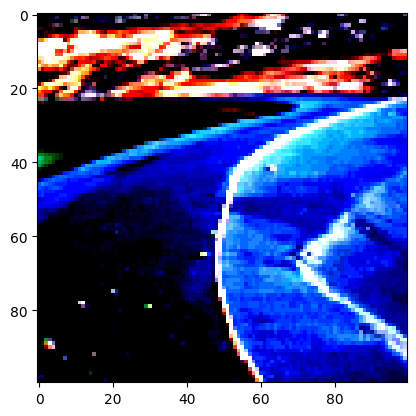

In [20]:
img_f = img.float()
x = transforms.Normalize(torch.mean(img_f), torch.std(img_f))
display_image(x.forward(img_f))